In [128]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
#Read data
df = pd.read_csv("../../Data/Tidy_Full.csv", index_col = 0)

In [430]:
#Inspect data
df.head()

,CompID,Name,Sex,Class,Division,BestBP,Total,Place,BestSQ,BestDL,...,BP2,BP3,Wilks,SQ1,SQ2,SQ3,DL1,DL2,DL3,DOB
Index,,,,,,,,,,,,,,,,,,,,,
0,1,Barbara Hamilton,F,56,MII,42.5/43,42.5,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Nat Zacharko,F,56,MI,60,60,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Dean Jenkinson,M,67.5,O,125,125,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Aaron McFarlane,M,67.5,O,105,105,2-Jan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,David Graham,M,67.5,MIII,52.5,52.5,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Goals:
- Homogenize column values
- Fix data types
- Change no-lifts to minus (rather than x suffix)

##### Sex column

In [98]:
#Inspect
df.Sex.value_counts()

M    15712
F     7056
Name: Sex, dtype: int64

In [224]:
#Fix
def fix_sex(df):
    df.Sex = df.Sex.replace({'m': 'M', 'f': 'F', 'W': 'F'})
    df.Sex = df.Sex.str.replace(' ','')
    df[df.Sex.str.contains('-')].Division.isnull().all() #All rows with div info in sex column have nulls in div column
    df.Division.fillna(pd.DataFrame(df.Sex.str.split('-').to_list(), columns = ['Sex', 'Division'])['Division'], inplace = True)
    df.Sex = pd.DataFrame(df.Sex.str.split('-').to_list(), columns = ['Sex', 'Division'])['Sex']
    return df

In [97]:
#Check fixes
df.Sex.value_counts()

M    15712
F     7056
Name: Sex, dtype: int64

##### Class column

<AxesSubplot:>

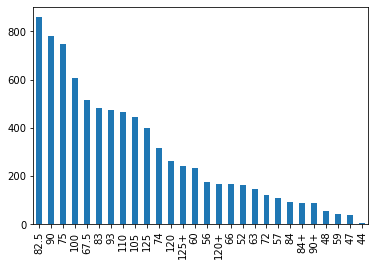

In [252]:
#Inspect
df[~df.Class.fillna('').str.match(r'^-?\d+(\.\d+)?[+]?$')].Class.value_counts() #Possibly bad values
#df[df.Class.fillna('').str.match(r'^-?\d+(\.\d+)?[+]?$')].Class.value_counts() #Okay values
#df[df.Class.fillna('').str.match(r'^-?\d+(\.\d+)?[+]?$')].Class.value_counts().plot(kind='bar') #Histogram of okay values

In [249]:
#Fix
def fix_class(df):
    df.Class = df.Class.str.replace('kg', '')
    df.Class = df.Class.str.replace('x', '')
    df.Class = df.Class.str.replace(' ', '')
    df[df.Class.fillna('').str.contains('-')].Division.isnull().all() #All rows with div info in class column have nulls in div column
    df.Division.fillna(pd.DataFrame(df.Class.fillna('').str.split('-').to_list(), columns = ['Class', 'Division'])['Division'], inplace = True)
    df.Class = pd.DataFrame(df.Class.fillna('').str.split('-').to_list(), columns = ['Class', 'Division'])['Class']
    df.Class.replace('', np.nan, inplace = True)
    #Look up special case comp tables to check for errors
    df.replace({'Class' : { '125.00+' : '125+', '66.9': '67.5', '55.9': '56', '62.5': '67.5', '67.6': '67.5', '75.5': '75'}}, inplace = True)
    for i in [1338, 1556, 1558, 3446, 3473, 7510, 7528]:
        temp = df.loc[i, 'BDW']
        df.loc[i, 'BDW'] = df.loc[i, 'Class']
        df.loc[i, 'Class'] = temp
    return df

In [251]:
#Check fixes
df.Class.value_counts()

82.5    859
90      782
75      746
100     606
67.5    516
83      483
93      474
110     464
105     447
125     401
74      315
120     262
125+    243
60      232
56      177
120+    167
66      166
52      162
63      145
72      121
57      110
84       91
84+      90
90+      89
48       56
59       42
47       37
44        5
Name: Class, dtype: int64

##### DOB column

In [425]:
#Inspect
df.DOB.value_counts()
#set([k[0] for j, k in df[df.DOB.notnull()].iterrows() if any(substring in k[21] for substring in ['PNG', 'NRU', '????', 'DQ', '-', 'NAU', 'NZPF', 'TUV', '???', 'PRC', 'NZ', 'NIU'])])

1993.0    955
1994.0    827
1992.0    827
1995.0    782
1991.0    642
1989.0    636
1990.0    627
1996.0    623
1997.0    548
1987.0    505
1988.0    479
1986.0    373
1998.0    359
1982.0    357
1985.0    325
1984.0    310
1981.0    299
1983.0    281
1980.0    261
1999.0    237
2000.0    206
1979.0    205
1977.0    190
1975.0    169
1978.0    157
1973.0    152
1970.0    150
1974.0    145
2001.0    137
1976.0    129
2002.0    124
1969.0    123
1965.0    117
1966.0    113
1971.0    106
1968.0    103
1967.0    102
1972.0    101
1964.0     95
1961.0     91
1962.0     86
1956.0     79
1948.0     74
1963.0     67
1958.0     63
1960.0     58
2003.0     52
1959.0     49
1957.0     42
1955.0     41
1949.0     37
2004.0     35
1945.0     32
1954.0     31
1947.0     29
1950.0     29
1953.0     28
1952.0     26
1944.0     20
1951.0     16
1939.0     15
1941.0     11
1943.0      7
2005.0      7
1940.0      6
1938.0      2
2006.0      2
1932.0      2
1946.0      1
1933.0      1
1930.0      1
2007.0

In [423]:
#Fix
def fix_dob(df):
    #Division in DOB column
    for i in [103, 109, 113, 114, 141, 142, 144, 146, 168, 177, 184, 214]:
        df.loc[df.CompID == i, 'Division'] = df.loc[df.CompID == i, 'DOB']
        df.loc[df.CompID == i, 'DOB'] = np.nan
    #Words in DOB column
    df.DOB.replace(['PNG', 'NRU', '????', 'DQ', '-', 'NAU', 'NZPF', 'TUV', '???', 'PRC', 'NZ', 'NIU'], np.nan, inplace = True)
    df.DOB.replace('`987', 1987, inplace = True)
    #Big numbers
    df.DOB.replace('\d{5}', np.nan, inplace = True, regex = True)
    #Small numbers
    df.replace({'DOB' : { '0' : np.nan, '1886': 1986, '1680': 1980, '995': 1995}}, inplace = True)
    df.loc[17261, 'DOB'] = 2018-30; df.loc[12972, 'DOB'] = 2016-35; df.loc[12975, 'DOB'] = 2018-30; df.loc[18635, 'DOB'] = 2018-27
    for i,j in zip([572, 574, 606, 612, 665, 939, 940], [2015, 2015, 2016, 2016, 2017, 2020, 2020]):
        df.loc[df.CompID == i, 'DOB'] = j-df.loc[df.CompID == i, 'DOB']
    #Too close to current year
    df.replace({'DOB' : { 2014 : np.nan, 2016: np.nan, 2020: np.nan}}, inplace = True)
    df.loc[12166, 'DOB'] = np.nan
    return df

In [429]:
#Check fixes
df.DOB.value_counts()

1993.0    955
1994.0    827
1992.0    827
1995.0    782
1991.0    642
1989.0    636
1990.0    627
1996.0    623
1997.0    548
1987.0    505
1988.0    479
1986.0    373
1998.0    359
1982.0    357
1985.0    325
1984.0    310
1981.0    299
1983.0    281
1980.0    261
1999.0    237
2000.0    206
1979.0    205
1977.0    190
1975.0    169
1978.0    157
1973.0    152
1970.0    150
1974.0    145
2001.0    137
1976.0    129
2002.0    124
1969.0    123
1965.0    117
1966.0    113
1971.0    106
1968.0    103
1967.0    102
1972.0    101
1964.0     95
1961.0     91
1962.0     86
1956.0     79
1948.0     74
1963.0     67
1958.0     63
1960.0     58
2003.0     52
1959.0     49
1957.0     42
1955.0     41
1949.0     37
2004.0     35
1945.0     32
1954.0     31
1947.0     29
1950.0     29
1953.0     28
1952.0     26
1944.0     20
1951.0     16
1939.0     15
1941.0     11
1943.0      7
2005.0      7
1940.0      6
1938.0      2
2006.0      2
1932.0      2
1946.0      1
1933.0      1
1930.0      1
2007.0

##### Division column

In [296]:
#Inspect
pd.options.display.max_rows = 999
#df.Division.value_counts()
#Check rows with weird entries
set([k[0] for j, k in df[df.Division.notnull()].iterrows() if any(substring in k[4] for substring in ['"'])])

{5, 10, 21, 30, 31, 48, 51, 53, 64, 66, 67, 70}

In [405]:
#Fix
def fix_division(df):
    df.loc[df.CompID == 64, 'Division'] = df[df.CompID == 64].Division.str.replace('"', 'Snr')
    df.Division = df.Division.str.replace('"', 'Open')
    divsemdf = pd.read_csv("../../Data/Division_semantics.csv", engine = 'python')
    #Map words to semantic meaning
    semdict = {tuple(divsemdf[divsemdf[col].notnull()][col]): col for col in divsemdf.columns}
    semmap = {}
    for k, v in semdict.items():
        for key in k:
            semmap[key] = v
    #Change words
    df.Division.replace(semmap, inplace = True)
    df.Division.replace('Unknown', np.nan, inplace = True)
    return df

In [428]:
#Check fixes
df.Division.value_counts()

O       3097
J        886
MI       822
MII      469
MIII     348
SJ       335
MIV       67
Name: Division, dtype: int64

##### Place column

In [439]:
#df.Place.value_counts()
df[~df.Wilks.fillna('').str.match(r'^-?\d+(\.\d+)?[+]?$')].Wilks.value_counts()
#Place - 280
#Wilks - 16391
#BDW - 3528

BMB          389
-            368
x              6
out            5
Disq.          4
343,02         2
231,37         2
411,60         2
352,01         2
344,24         2
423,08         2
331,04         2
423,41         2
450,14         2
338,72         2
324,09         2
297,47         2
369,20         2
358,17         2
369,65         2
345,10         2
340,41         2
331,55         2
361,59         2
281,74         2
408,68         2
449,17         2
344,52         2
309,60         2
312,56         2
397,16         2
375,98         2
300,51         2
264,79         2
318,96         2
296,59         2
358,68         2
356,67         2
387,15         2
284,38         2
418,95         2
337,26         2
275,57         2
350,47         2
265,36         2
324,69         2
373,91         2
381,84         1
354,43         1
299,40         1
410,64         1
369,71         1
275,40         1
277,68         1
292,89         1
301,31         1
287,35         1
98,65          1
472,13        

In [432]:
df.columns

Index(['CompID', 'Name', 'Sex', 'Class', 'Division', 'BestBP', 'Total',
       'Place', 'BestSQ', 'BestDL', 'BDW', 'BP1', 'BP2', 'BP3', 'Wilks', 'SQ1',
       'SQ2', 'SQ3', 'DL1', 'DL2', 'DL3', 'DOB'],
      dtype='object')

In [427]:
#One function
def fix_all(df):
    df = fix_sex(df)
    df = fix_class(df)
    df = fix_dob(df)
    df = fix_division(df)
    return df
df = fix_all(pd.read_csv("../../Data/Tidy_Full.csv", index_col = 0))